<a href="https://colab.research.google.com/github/MariiaS/ai_and_ds/blob/main/DS4B_Session2_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS4B Session 2: Data exploration, dimensionality reduction, Principal Component Analysis
This assignment will use Python.
The first part will show you various possibilities for exploring the data. The content inspired from [a Kaggle notebook](https://www.kaggle.com/ash316/learn-pandas-with-pokemons/data).

In the second part, you will reduce the dimensionality of the dataset.


## 1. Explore the data
The data is stored in the 'Pokemon.csv'.

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import the data
The dataset contains two columns containing the amount of hours studied and the test scores students achieved, respectively.

In [ ]:
df =  pd.read_csv('./Pokemon.csv')  #read the csv file and save it into a variable
df.head(n=10)                       #print the first 10 rows of the table

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


### Prepare the data and clean the dataframe

In [ ]:
df.columns = df.columns.str.upper().str.replace(' ', '') #change into upper case, remove spaces
df.head()

,#,NAME,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df = df.set_index('NAME') #change and set the index to the name attribute

In [ ]:
## The index of Mega Pokemons contained extra and unneeded text. Removed all the text before "Mega"  
df.index = df.index.str.replace(".*(?=Mega)", "")
df.head(10)

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,1,False
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,1,False
Mega Charizard X,6,Fire,Dragon,634,78,130,111,130,85,100,1,False
Mega Charizard Y,6,Fire,Flying,634,78,104,78,159,115,100,1,False


### Play with the data

In [ ]:
df[df['LEGENDARY']==True].head(5)  #Showing the legendary pokemons

,#,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,,
Articuno,144,Ice,Flying,580,90,85,100,95,125,85,1,True
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
Moltres,146,Fire,Flying,580,90,100,90,125,85,90,1,True
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True
Mega Mewtwo X,150,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
print('The columns of the dataset are: ',df.columns) #show the dataframe columns
print('The shape of the dataframe is: ',df.shape)    #shape of the dataframe

The columns of the dataset are:  Index(['#', 'TYPE1', 'TYPE2', 'TOTAL', 'HP', 'ATTACK', 'DEFENSE', 'SP.ATK',
       'SP.DEF', 'SPEED', 'GENERATION', 'LEGENDARY'],
      dtype='object')
The shape of the dataframe is:  (800, 12)


In [ ]:
df=df.drop(['#'],axis=1) #drop the columns with axis=1;axis=0 is for rows

In [ ]:
#some values in TYPE2 are empty and thus they have to be filled or deleted
df['TYPE2'].fillna(df['TYPE1'], inplace=True) #fill NaN values in Type2 with corresponding values of Type
df.head()

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [ ]:
print(df.loc['Bulbasaur']) #retrieves complete row data from index with value Bulbasaur
print(df.iloc[0]) #retrieves complete row date from index 0 ; integer version of loc
#in oreder to find details about any pokemon, just specify its name

TYPE1          Grass
TYPE2         Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP.ATK            65
SP.DEF            65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object
TYPE1          Grass
TYPE2         Poison
TOTAL            318
HP                45
ATTACK            49
DEFENSE           49
SP.ATK            65
SP.DEF            65
SPEED             45
GENERATION         1
LEGENDARY      False
Name: Bulbasaur, dtype: object


In [ ]:
#filtering pokemons using logical operators
df[((df['TYPE1']=='Fire') | (df['TYPE1']=='Dragon')) & ((df['TYPE2']=='Dragon') | (df['TYPE2']=='Fire'))].head(3)

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False


In [ ]:
print("Max HP:",df['HP'].argmax())  #returns the pokemon with highest HP
print("Max DEFENSE:",(df['DEFENSE']).idxmax()) #similar to argmax()

Max HP: 261
Max DEFENSE: Mega Steelix


In [ ]:
df.sort_values('TOTAL',ascending=False).head(3)  #this arranges the pokemons in the descendng order of the Totals.
#sort_values() is used for sorting and ascending=False is making it in descending order

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY
NAME,,,,,,,,,,,
Mega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
Mega Mewtwo Y,Psychic,Psychic,780,106,150,70,194,120,140,1,True
Mega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [ ]:
print('The unique  pokemon types are',df['TYPE1'].unique()) #shows all the unique types in column
print('The number of unique types are',df['TYPE1'].nunique()) #shows count of unique values 

The unique  pokemon types are ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
The number of unique types are 18


In [ ]:
print(df['TYPE1'].value_counts(), '\n' ,df['TYPE2'].value_counts())#count different types of pokemons
df.groupby(['TYPE1']).size()  #same as above
(df['TYPE1']=='Bug').sum() #counts for a single value

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: TYPE1, dtype: int64 
 Flying      99
Water       73
Psychic     71
Normal      65
Grass       58
Poison      49
Ground      48
Fighting    46
Fire        40
Fairy       38
Electric    33
Dark        30
Dragon      29
Steel       27
Ice         27
Ghost       24
Rock        23
Bug         20
Name: TYPE2, dtype: int64


69

In [ ]:
df_summary = df.describe() #summary of the pokemon dataframe
df_summary

,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


## 2. Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


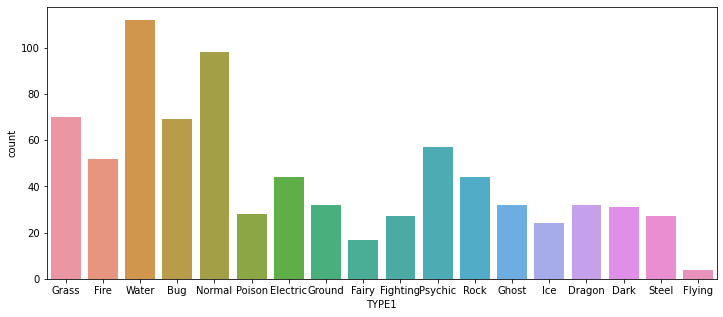

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(df['TYPE1'])

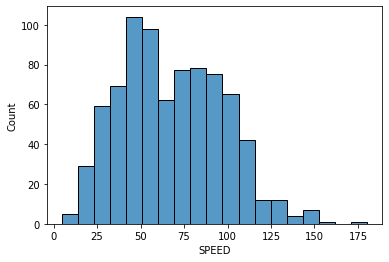

In [ ]:
sns.histplot(df.SPEED)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  


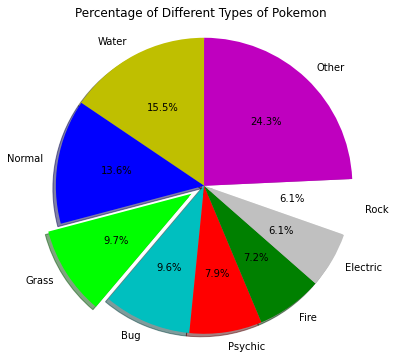

In [ ]:
labels = 'Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Other'
sizes = [112, 98, 70, 69, 57, 52, 44, 44, 175]
colors = ['Y', 'B', '#00ff00', 'C', 'R', 'G', 'silver', 'white', 'M']
explode = (0, 0, 0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 3rd slice 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Different Types of Pokemon")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

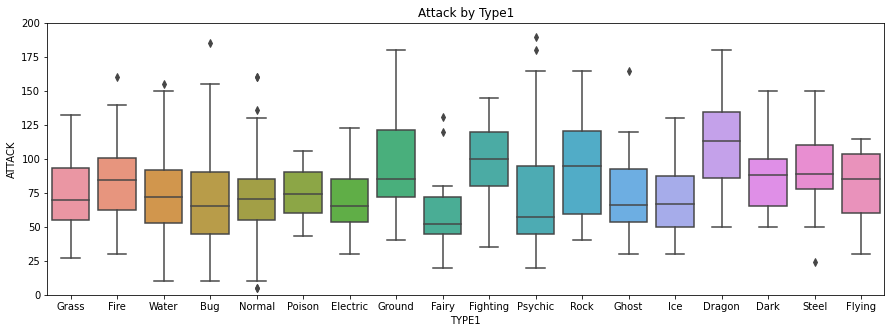

In [ ]:
plt.subplots(figsize = (15,5))
plt.title('Attack by Type1')
sns.boxplot(x = "TYPE1", y = "ATTACK",data = df)
plt.ylim(0,200)
plt.show()

## 3. Finding any correlation between the attributes

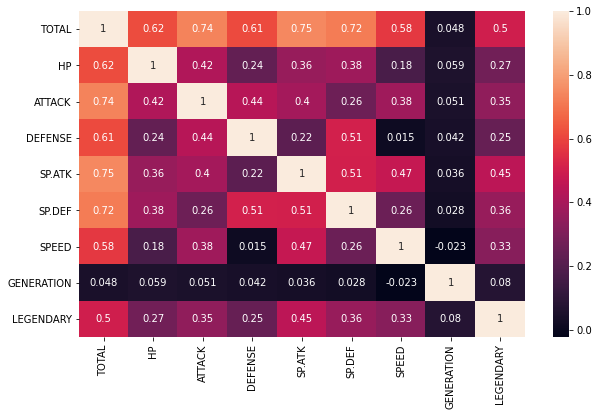

In [ ]:
plt.figure(figsize=(10,6)) #manage the size of the plot
sns.heatmap(df.corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

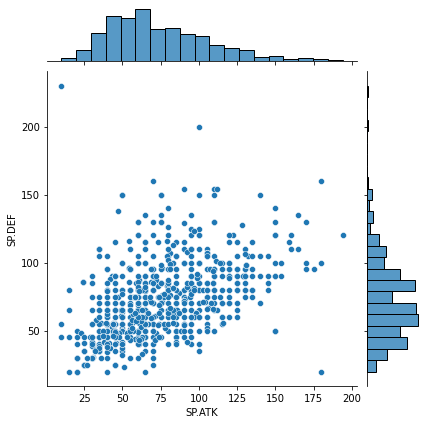

In [ ]:
sns.jointplot(data=df, x='SP.ATK', y='SP.DEF')

## 4. PCA

Now, let's get back to PCA.
### Select some input features and a target

Making **legendary** binary 0 or 1 in order to operate easier with it if needed.

In [ ]:
df['LEGENDARY'] = df['LEGENDARY'].astype(int)
df.head()

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,x,y
NAME,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,-41.008923,6.178265
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,-11.576066,3.616741
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,31.283585,-2.652690
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,51.024227,-4.969037
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,-46.309265,10.884782


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


features = ['ATTACK', 'SPEED', 'DEFENSE', 'SP.ATK',	'SP.DEF', 'GENERATION', 'HP']  # FIXME Select some input features
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['LEGENDARY']].values # FIXME Select the target

# Standardizing the features
x = StandardScaler().fit_transform(x)

### Project the data into a lower n-dimensional space

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # FIXME Choose the number of dimensions
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PCA1', 'PCA2', 'PCA3']) # FIXME Give a name to the dimensions

### Concatenate the target

In [ ]:
finalDf = pd.concat([principalDf, df[['TOTAL']]], axis = 1) # FIXME Concatenate the target
finalDf.shape
finalDf.head()
print(pca.explained_variance_ratio_)

[0.38791728 0.15854266 0.14092884]


In [ ]:
print(pca.explained_variance_ratio_.cumsum())

[0.38791728 0.54645993 0.68738877]


### Use the pairplot to visally inspect and verify if there remains any correlation.

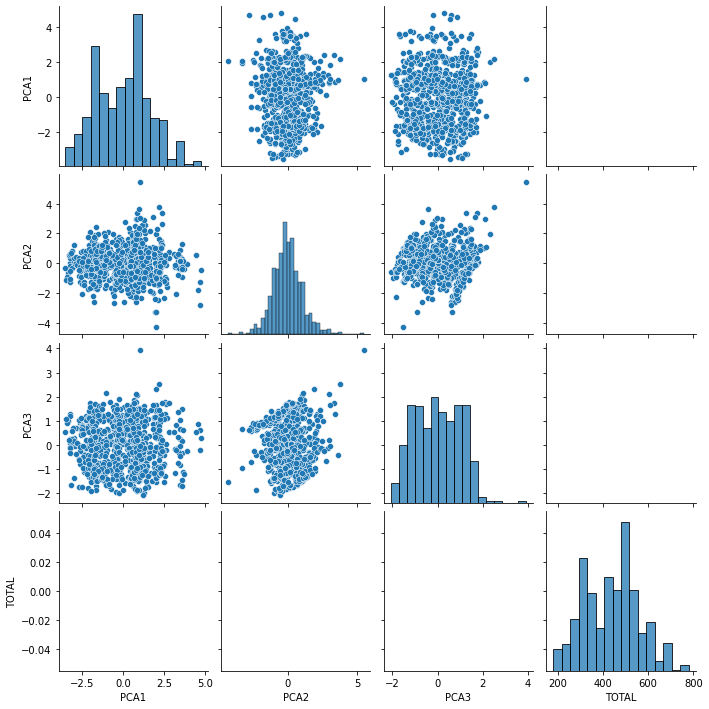

In [ ]:
sns.pairplot(finalDf)
plt.show()

## Alternative for 2D visualization: t-SNE


In [ ]:
non_numeric = ['TYPE1',	'TYPE2'] # FIXME Remove non numeric features
''' P.S. I turned Legendary to numeric value as well, so I'm not removing it here. '''
df_numeric = df.drop(non_numeric, axis=1)
df_numeric.shape

(800, 11)

In [ ]:
from sklearn.manifold import TSNE
m = TSNE(learning_rate=50)
tsne_features = m.fit_transform(df_numeric)
tsne_features[1:4,:]

array([[  8.864063 , -12.231902 ],
       [-18.98838  ,   5.6509395],
       [-30.548397 ,  24.672768 ]], dtype=float32)

In [ ]:
df['x'] = tsne_features[:,0]
df['y'] = tsne_features[:,1]

In [ ]:
df.head()

,TYPE1,TYPE2,TOTAL,HP,ATTACK,DEFENSE,SP.ATK,SP.DEF,SPEED,GENERATION,LEGENDARY,x,y
NAME,,,,,,,,,,,,,
Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,35.674473,0.309182
Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,8.864063,-12.231902
Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,-18.988380,5.650939
Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,-30.548397,24.672768
Charmander,Fire,Fire,309,39,52,43,60,50,65,1,0,40.230145,5.045110


###  Now you are ready to display the scatterplot.

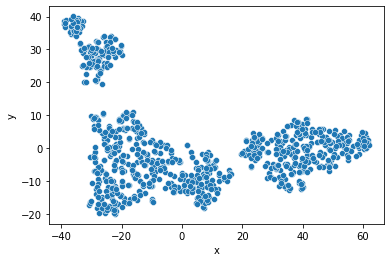

In [ ]:
sns.scatterplot(x="x", y="y", data=df)
plt.show()

###  Use the "hue" option to display each feature in turn.

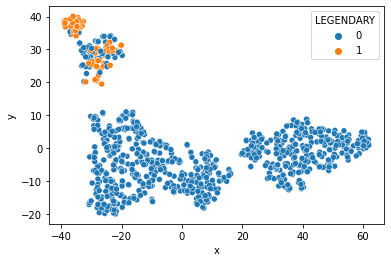

In [ ]:
sns.scatterplot(x="x", y="y", hue='LEGENDARY', data=df) # FIXME Choose a feature
plt.show()

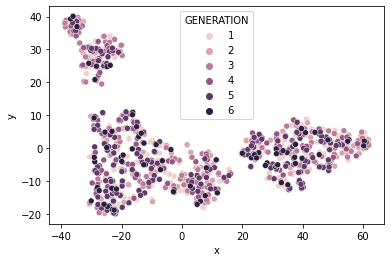

In [ ]:
sns.scatterplot(x="x", y="y", hue='GENERATION', data=df) # FIXME Choose a feature
plt.show()

Describe your analysis and what you learnt in a few lines (3-5):

In a first part of the notebook we learnt how to operate with data - clean it, change the column names, filter by values, get the maximum data, get rid of NaNs and things like this that helps in the futher data visualisation. 

In the second part we were visualising the data using libraries *pyplot and seaborn*.

In the third part we learnt how to visualise the correlation of the features using the heatmap. 

On the forth part we were learning PCA to reduce the dimension of the features. In our example, we were taking seven features and reduced the dimension to three using the PCA. Basically, PCA allows to reduce the dimension so that the resulting features are not corellated (orthogonal). We can choose how much we want to reduce the dimensions experimenting with the *explained_variance_ratio* parameter but the better way is to automatically set the variance to be above 90% for example and get the suggestion for the number of components. 

In the last part we were exploring the alternative of data representation, by using a hue as a kind of "third dimension of data representation", showing on the 2D-plot specific feature by color. We are using t-distributed stochastic neighbor embedding for visualizing our high-dimensional data by giving each datapoint a location in a 2D-map.

